In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
##  Question 1How has export growth (%) changed over time for a selected country like Kenya, Nigeria, or India?
##Visualization Type: Line chart
##Skills Practiced: Filtering by country, unpivoting year columns, time series analysis.

export=pd.read_csv('export.csv', skiprows=4)
export.head(0)

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Index: []

[0 rows x 69 columns]

In [ ]:
selected_country = "India" 
# Filter and reshape
country_export = export[export["Country Name"] == selected_country].copy()
year_columns = [col for col in country_export.columns if col.isdigit()] ##Identifies all column names that are numeric strings 
country_long = pd.melt(country_export, id_vars=["Country Name", "Country Code"], 
                       value_vars=year_columns, var_name="Year", value_name="Export with Growth (%)")
# Convert Year to datetime and sort
country_long["Year"] = pd.to_datetime(country_long["Year"], format="%Y")##Converts the Year column from string to datetime format
country_long = country_long.sort_values(by="Year")##Sorts the DataFrame in order based on the Year column
print(country_long.head())

  Country Name Country Code       Year  Export with Growth (%)
0        India          IND 1960-01-01                     NaN
1        India          IND 1961-01-01               -0.185873
2        India          IND 1962-01-01               -0.579831
3        India          IND 1963-01-01                8.404078
4        India          IND 1964-01-01               -6.512050


A positive number indicates growth.

A negative number indicates a decline in exports.

A NaN means data is missing for that year.

In [84]:

selected_country = "Kenya"  # You can change to "India" or "Nigeria"

# Filter and reshape
country_export = export[export["Country Name"] == selected_country].copy()
year_columns = [col for col in country_export.columns if col.isdigit()]
country_long = pd.melt(country_export, id_vars=["Country Name", "Country Code"], 
                       value_vars=year_columns, var_name="Year", value_name="Export Growth (%)")

# Convert Year to datetime and sort
country_long["Year"] = pd.to_datetime(country_long["Year"], format="%Y")
country_long = country_long.sort_values(by="Year")
print(country_long.head(3))

  Country Name Country Code       Year  Export Growth (%)
0        Kenya          KEN 1960-01-01                NaN
1        Kenya          KEN 1961-01-01          10.546254
2        Kenya          KEN 1962-01-01           9.757071


In [85]:

selected_country = "Nigeria"  # You can change to "India" or "Nigeria"

# Filter and reshape
country_export = export[export["Country Name"] == selected_country].copy()
year_columns = [col for col in country_export.columns if col.isdigit()]
country_long = pd.melt(country_export, id_vars=["Country Name", "Country Code"], 
                       value_vars=year_columns, var_name="Year", value_name="Export Growth (%)")

# Convert Year to datetime and sort
country_long["Year"] = pd.to_datetime(country_long["Year"], format="%Y")
country_long = country_long.sort_values(by="Year")
print(country_long.head(3))

  Country Name Country Code       Year  Export Growth (%)
0      Nigeria          NGA 1960-01-01                NaN
1      Nigeria          NGA 1961-01-01                NaN
2      Nigeria          NGA 1962-01-01                NaN


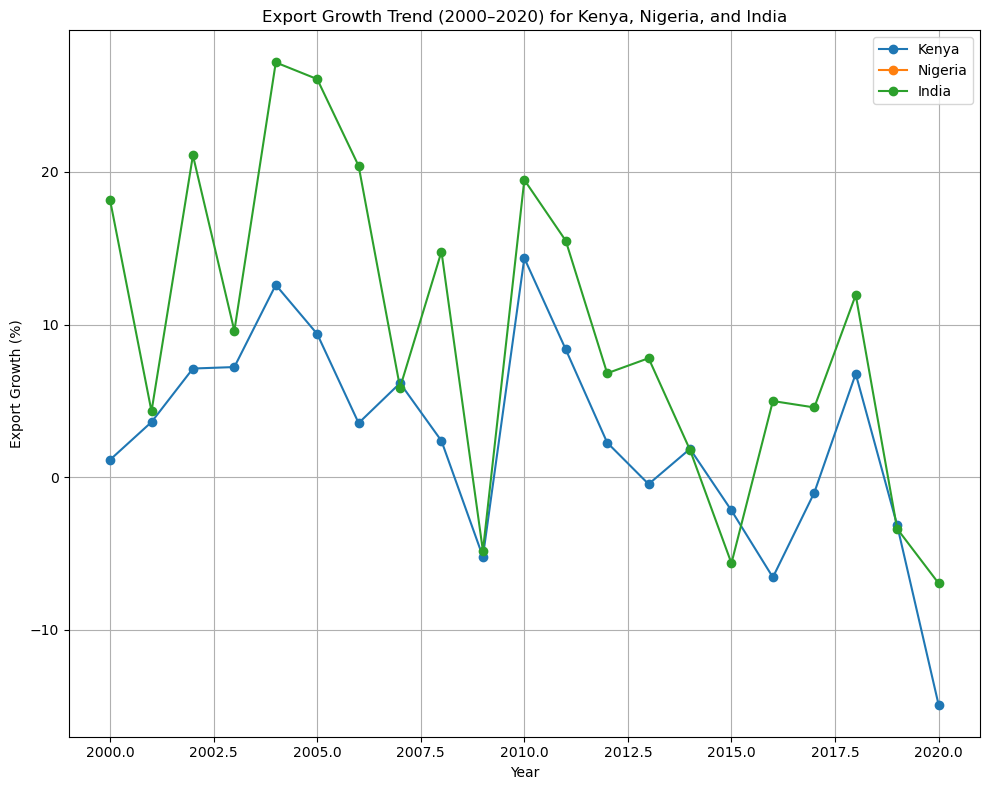

In [ ]:
plt.figure(figsize=(10, 8))##Sets the figure size to 10 inches wide by 6 inches tall 
for country in countries: ##Starts a loop through the list of countries
    country_data = export_selected[export_selected['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Export Growth'], marker='o', label=country)

plt.title('Export Growth Trend (2000–2020) for Kenya, Nigeria, and India')
plt.xlabel('Year')
plt.ylabel('Export Growth (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                 Country Name  Export Growth
240               Timor-Leste      63.558203
70                    Eritrea      51.692858
246              Turkmenistan      30.579584
140                     Libya      27.837715
264                    Zambia      27.404318
..                        ...            ...
233                  Suriname            NaN
243       Trinidad and Tobago            NaN
247  Turks and Caicos Islands            NaN
248                    Tuvalu            NaN
254       Upper middle income            NaN

[266 rows x 2 columns]


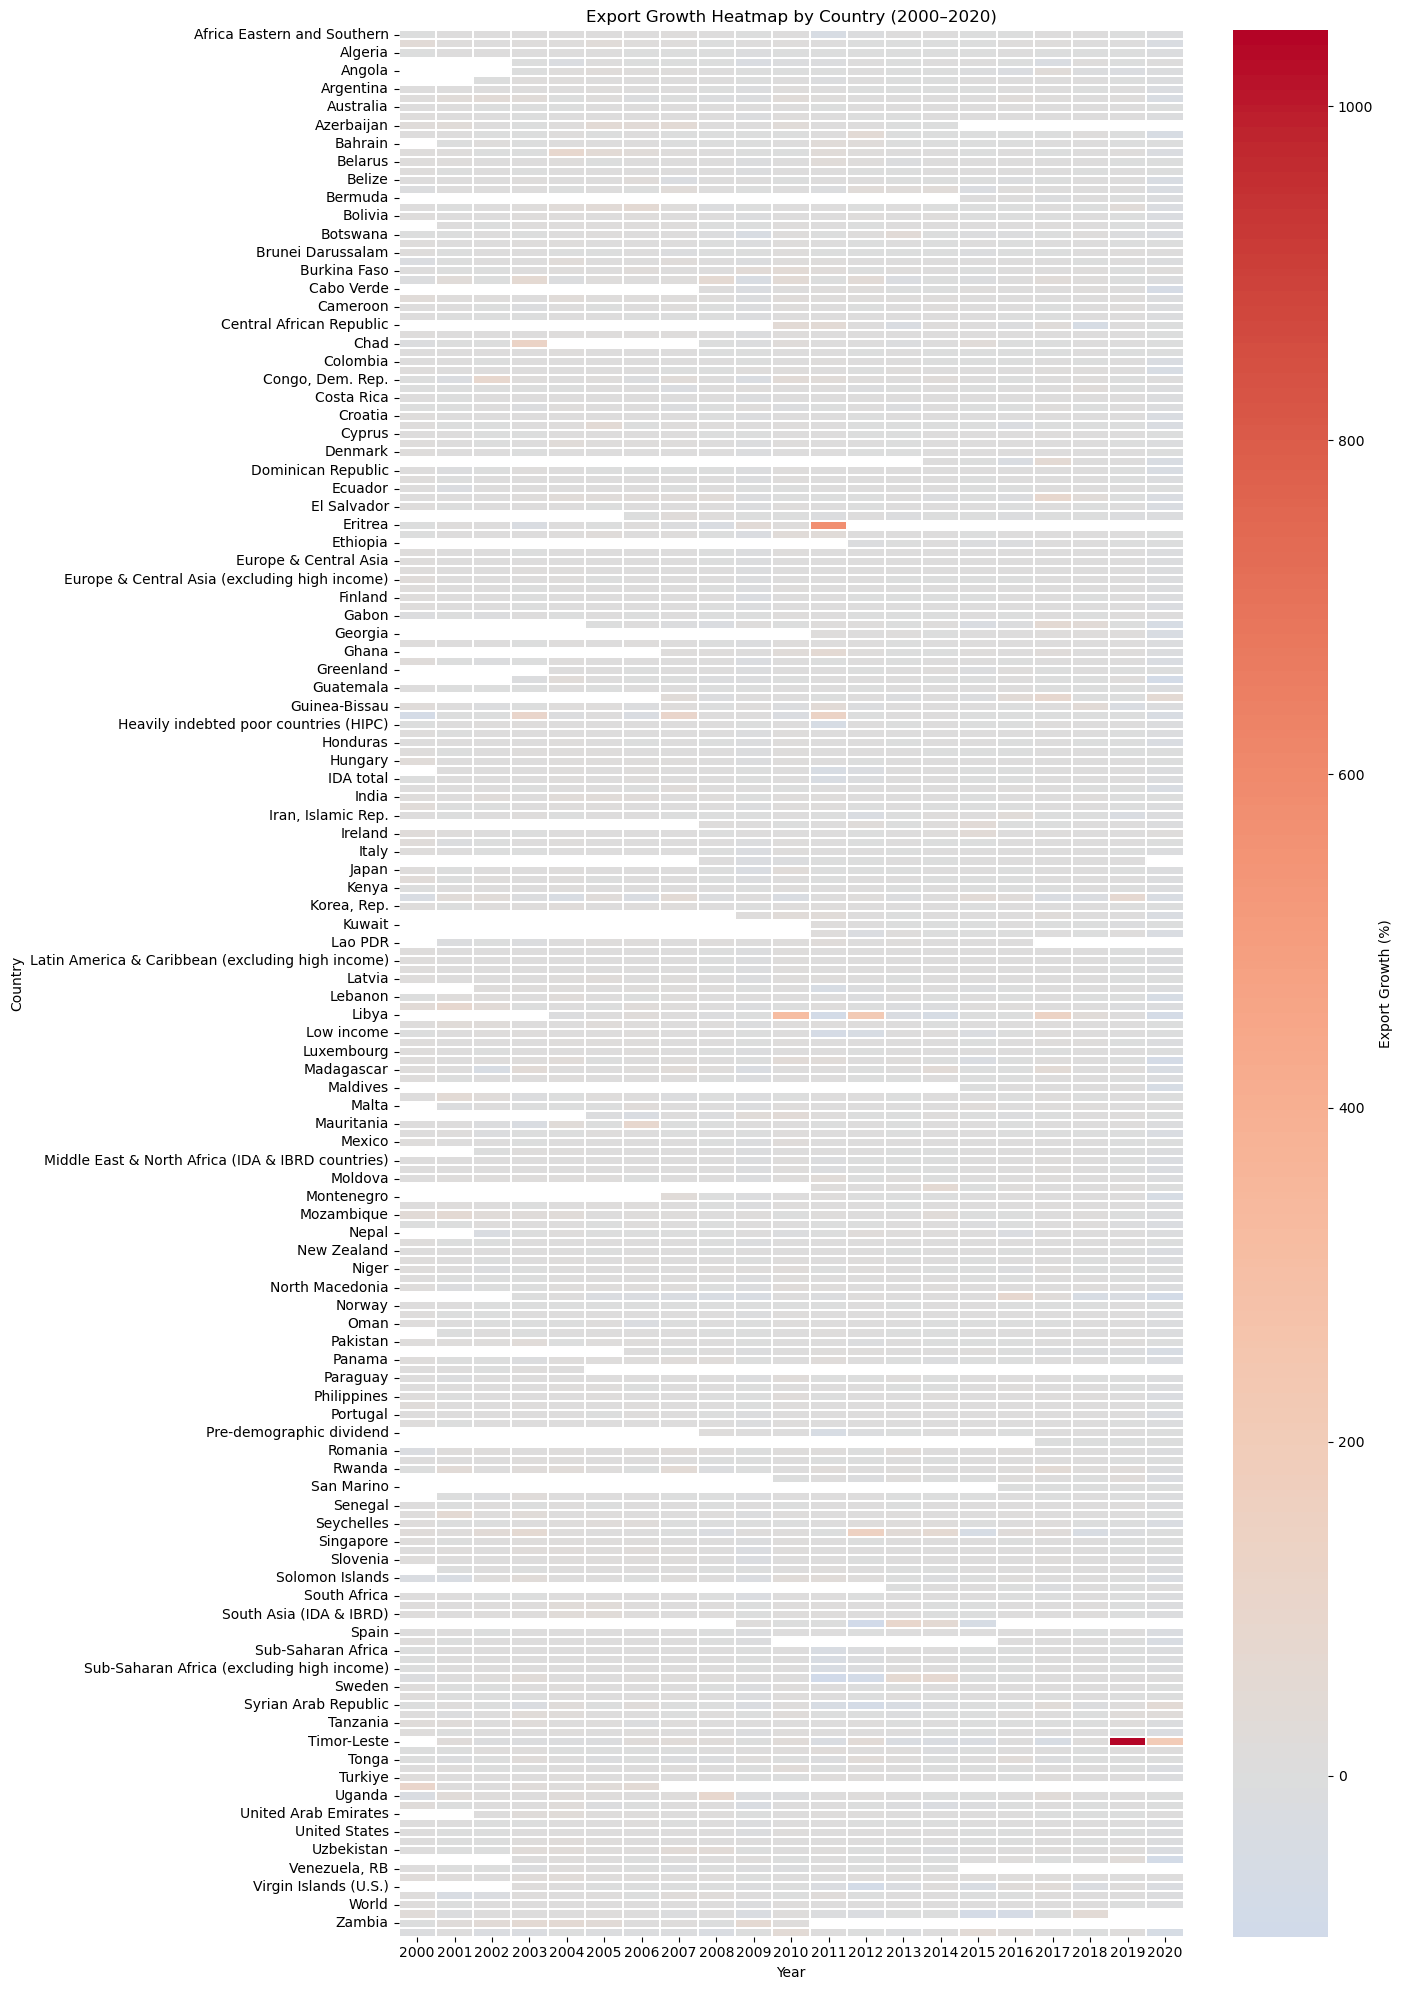

In [97]:
##Question 2  Which countries had the highest and lowest average export growth between 2000 and 2020?
##Visualization Type: Heatmap or conditional color matrix
##Skills Practiced: Aggregating over years, conditional formatting, sorting.
avg_growth = export_filtered.groupby("Country Name")["Export Growth"].mean().reset_index()
avg_growth = avg_growth.sort_values(by="Export Growth", ascending=False)
print(avg_growth)
heatmap_data = export_filtered.pivot_table(
    index="Country Name",
    columns="Year",
    values="Export Growth"
)
plt.figure(figsize=(14, 20))
sns.heatmap(heatmap_data, cmap="coolwarm", center=0, annot=False, linewidths=0.3, cbar_kws={"label": "Export Growth (%)"})
plt.title("Export Growth Heatmap by Country (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

analysis.   1.dark red-high export growth   2.light red-moderate growth   3.gray or white- zero growth or missing data     4.blue negavive export growth

Eritrea (2010) and Timor-Leste (2018) display dark red, indicating high export growth

Most Countries Show Light Gray or White Rows-  indicating low or moderate export growth in most years.

2020-most countries show missing values could be due to pandemic



In [100]:
## Question 3.How did export growth evolve geographically across the world from 2000 to 2020?
##Visualization Type: Animated map (play axis with year)
##Skills Practiced: Geospatial mapping, time-based animation
fig = px.choropleth(export_filtered,
                    locations="Country Code",
                    color="Export Growth",
                    hover_name="Country Name",
                    animation_frame="Year",
                    color_continuous_scale="Viridis",
                    title="Global Export Growth (2000–2020)")

fig.update_layout(coloraxis_colorbar=dict(title="Export Growth (%)"))
fig.show()



Country Name
Ghana           13.039065
Guinea          13.259751
Rwanda          13.760257
Azerbaijan      16.679778
Sierra Leone    17.702294
Zambia          27.404318
Libya           27.837715
Turkmenistan    30.579584
Eritrea         51.692858
Timor-Leste     63.558203
Name: Export Growth, dtype: float64


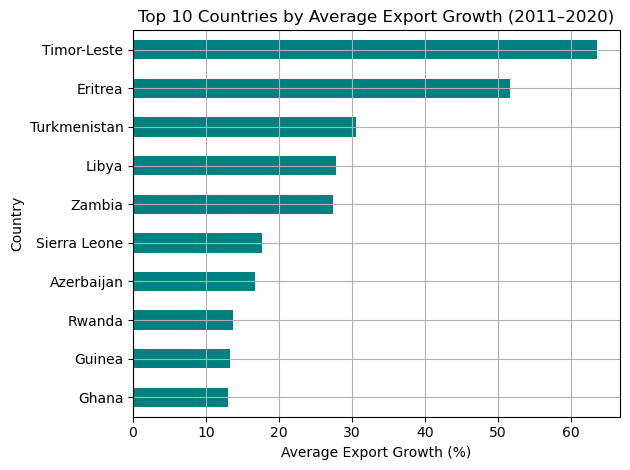

In [107]:
##Question 4.Which 10 countries had the highest average export growth in the last 10 years?
##Visualization Type: Horizontal bar chart
##Skills Practiced: Ranking, time filtering, grouping by country.
top10_growth = export_filtered.groupby("Country Name")["Export Growth"].mean().nlargest(10).sort_values()
print(top10_growth )
top10_growth.plot(kind='barh', color='teal')
plt.title("Top 10 Countries by Average Export Growth (2011–2020)")
plt.xlabel("Average Export Growth (%)")
plt.ylabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()

Timor-Leste stands out as the top performer, with the highest export growth percentage, reaching more than 60%. This suggests significant improvement in Timor-Leste’s export sector during this period.

Guinea and Ghana complete the list, with export growth percentages on the lower end, still indicating positive growth, though not as high as the leading countries.

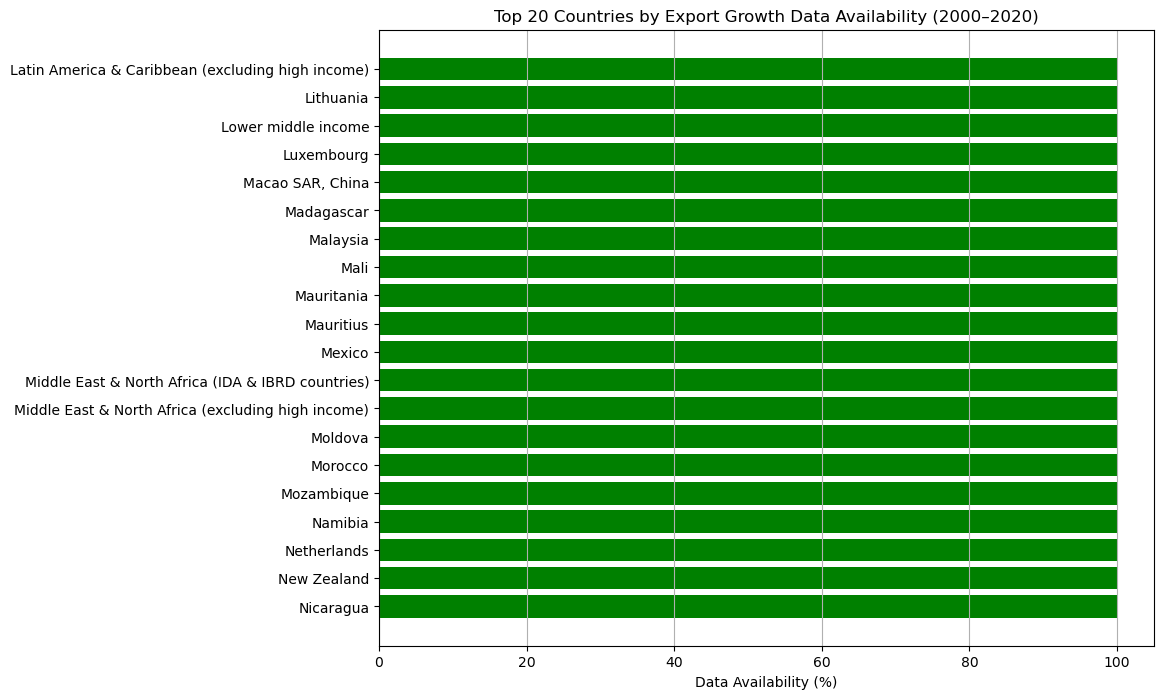

In [116]:
## Question 5   What percentage of export growth data is available for each country?
##Visualization Type: Gauge chart or bar with % label
##Skills Practiced: Data completeness analysis, calculated measures.
total_years = export_filtered["Year"].nunique()
completeness = export_filtered.groupby("Country Name")["Export Growth"].apply(lambda x: x.notna().sum() / total_years * 100)
completeness_export = completeness.reset_index().rename(columns={"Export Growth": "Data Availability (%)"})
completeness_export = completeness_export.sort_values(by="Data Availability (%)", ascending=False)
# Plot the top 20 countries with the highest data availability
plt.figure(figsize=(10, 8))
bars = plt.barh(completeness_export["Country Name"].head(20), completeness_export["Data Availability (%)"].head(20), color='green')
plt.xlabel("Data Availability (%)")
plt.title("Top 20 Countries by Export Growth Data Availability (2000–2020)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')

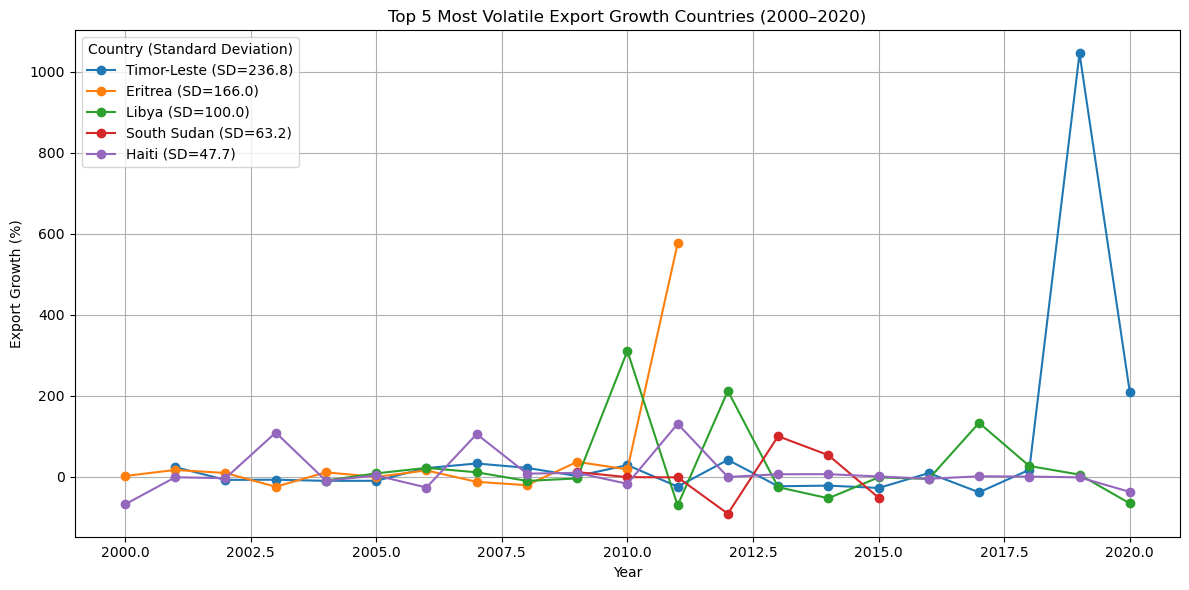

In [127]:
## Question 6.Question: Which countries experienced the most volatile export growth rates over the last 20 years?
##Visualization Type: Line chart with standard deviation tooltip
##Skills Practiced: Calculated fields (stdev), line comparisons.
# Calculate standard deviation (volatility) for each country
volatility = export_filtered.groupby("Country Name")["Export Growth"].std().reset_index()
volatility = volatility.sort_values(by="Export Growth", ascending=False).rename(columns={"Export Growth": "Volatility"})
top_volatile_countries = volatility.head(5)["Country Name"].tolist()

# Filter original data to only include top 5 countries
top_volatile_data = export_filtered[export_filtered["Country Name"].isin(top_volatile_countries)]

# Plot export growth lines for the most volatile countries
plt.figure(figsize=(12, 6))
for country in top_volatile_countries:
    country_data = top_volatile_data[top_volatile_data["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Export Growth"], marker='o', label=f"{country} (SD={country_data['Export Growth'].std():.1f})")

plt.title("Top 5 Most Volatile Export Growth Countries (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Export Growth (%)")
plt.legend(title="Country (Standard Deviation)")
plt.grid(True)
plt.tight_layout()
plt.show()




Analysis

Higher SD → greater ups and downs (instability)
Lower SD → smoother, more stable growth

Timor-Leste and Eritrea show the highest levels of export instability, which may limit long-term investment.-high volatile

Haiti volatile, exhibits smaller-scale disruptions.

C:\Users\len\AppData\Local\Temp\ipykernel_16872\1730540143.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



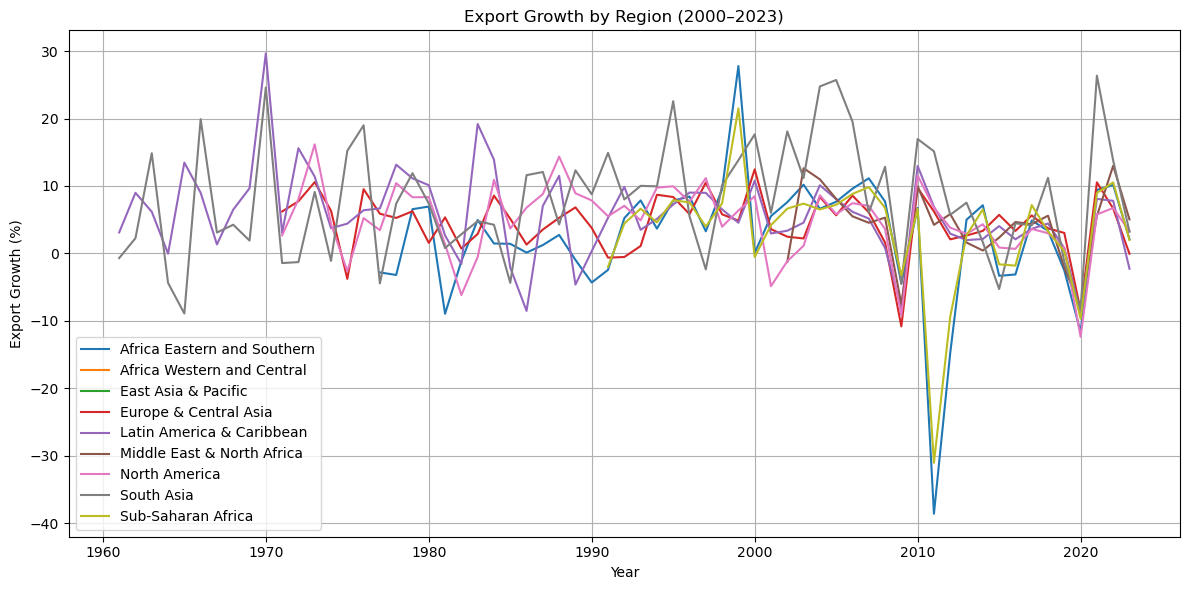

In [137]:
## Question 7  How do export trends compare across regions like Sub-Saharan Africa, Europe & Central Asia, etc.?
##Visualization Type: Multi-line chart or clustered column chart
##Skills Practiced: Grouping by region, average per year.
export_region = export_long[export_long["Country Name"].isin(selected_regions)]
export_region["Region"] = export_region["Country Name"]  # Rename for clarity
region_avg_simple = export_region.groupby(["Region", "Year"])["Export Growth"].mean().reset_index()
plt.figure(figsize=(12, 6))
for region in region_avg_simple["Region"].unique():
    data = region_avg_simple[region_avg_simple["Region"] == region]
    plt.plot(data["Year"], data["Export Growth"], label=region)

plt.title("Export Growth by Region (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Export Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Analysis

Sub-Saharan Africa:Shows high volatility


C:\Users\len\AppData\Local\Temp\ipykernel_16872\3315609435.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\len\AppData\Local\Temp\ipykernel_16872\3315609435.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



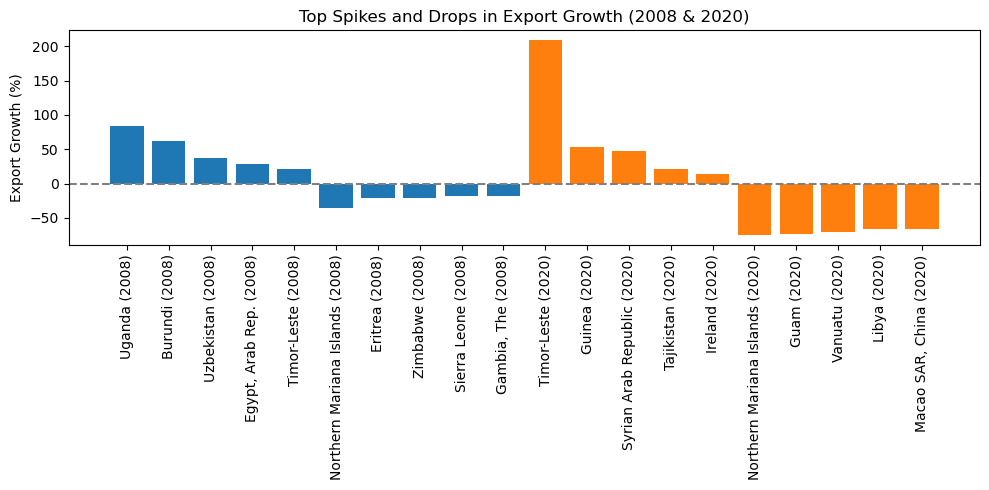

In [143]:
## Question 8.  Which countries had sudden drops or spikes in export growth during a specific year (e.g., 2008 financial crisis or 2020 COVID)?
##Visualization Type: Line chart with markers or deviation highlights
##Skills Practiced: Outlier detection, year-specific filtering.
# Simple code to show biggest spikes/drops in export growth for 2008 and 2020
crisis_years = [2008, 2020]
export_crisis = export_long[export_long["Year"].isin(crisis_years)]
export_crisis = export_crisis.dropna(subset=["Export Growth"])
top_spikes = export_crisis.groupby("Year").apply(lambda x: x.nlargest(5, "Export Growth")).reset_index(drop=True)
top_drops = export_crisis.groupby("Year").apply(lambda x: x.nsmallest(5, "Export Growth")).reset_index(drop=True)
top_extremes = pd.concat([top_spikes, top_drops])
plt.figure(figsize=(10, 5))
for year in crisis_years:
    subset = top_extremes[top_extremes["Year"] == year]
    plt.bar(subset["Country Name"] + f" ({year})", subset["Export Growth"], label=str(year))

plt.title("Top Spikes and Drops in Export Growth (2008 & 2020)")
plt.ylabel("Export Growth (%)")
plt.xticks(rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()



In [134]:
## Question 9.Can we create an interactive dashboard showing export trends by country, region, and year with filters and slicers?
##Visualization Type: Composite dashboard with filters (slicer panel)
##Skills Practiced: Creating dashboards, sync slicers, interactivity.
export_long = export.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                  var_name="Year", value_name="Export Growth")
export_long["Year"] = pd.to_numeric(export_long["Year"], errors='coerce')
export_filtered = export_long[(export_long["Year"] >= 2000) & (export_long["Year"] <= 2020)]
print(export_filtered)
print(export_long)
fig = px.line(export_filtered,
              x="Year",
              y="Export Growth",
              color="Country Name",
              hover_name="Country Name",
              title="Export Growth Trends by Country (2000–2020)",
              labels={"Export Growth": "Export Growth (%)"},
              animation_frame="Year")

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Export Growth (%)",
    legend_title_text="Country"
)

fig.show()

                      Country Name Country Code  \
10640                        Aruba          ABW   
10641  Africa Eastern and Southern          AFE   
10642                  Afghanistan          AFG   
10643   Africa Western and Central          AFW   
10644                       Angola          AGO   
...                            ...          ...   
16221                       Kosovo          XKX   
16222                  Yemen, Rep.          YEM   
16223                 South Africa          ZAF   
16224                       Zambia          ZMB   
16225                     Zimbabwe          ZWE   

                                        Indicator Name     Indicator Code  \
10640  Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   
10641  Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   
10642  Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   
10643  Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   
10